# Parte 1, EDA


Objetivo: Realizar un análisis exploratorio de los datos para entender su estructura, identificar valores
faltantes, outliers y posibles errores.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [76]:
df = pd.read_csv('brain_tumor_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [77]:
df.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,49.433700,5.236552,70.131699,1.547701
std,5773.647028,17.389296,2.754359,17.270834,0.835995
min,1.000000,20.000000,0.500410,40.002386,0.100017
25%,5000.750000,34.000000,2.836686,55.224439,0.830433
50%,10000.500000,49.000000,5.200675,70.305066,1.541821
75%,15000.250000,65.000000,7.624299,85.043395,2.262484
max,20000.000000,79.000000,9.999420,99.998125,2.999835


In [78]:
#Chequear valores nulos
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

Observamos que no tenemos valores nulos por lo que los datos estan completos 

In [79]:
#Chequeamos que los tipos de datos sean correctos 
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

Todas las columnas tienen los correspondientes tipos de datos, por lo que aqui tampoco hay que transformar nada.

#### Distribucion de tumores segun tipo, ubicacion, histologia y etapa
 

In [80]:
#Funcion para grafico de barras 
def grafico_bar(df_x, df_y, figname, Title_X, Title_Y, tinta):
    plt.bar(df_x, df_y, width=0.6, color=tinta)
    plt.title(figname)
    plt.xlabel(Title_X)
    plt.ylabel(Title_Y)   

    plt.show()
    
    return

In [81]:
# Por tipo 
df_type = df[['Tumor_Type']].groupby('Tumor_Type').size().reset_index(name='counts')
df_type.head()

,Tumor_Type,counts
0,Benign,9970
1,Malignant,10030


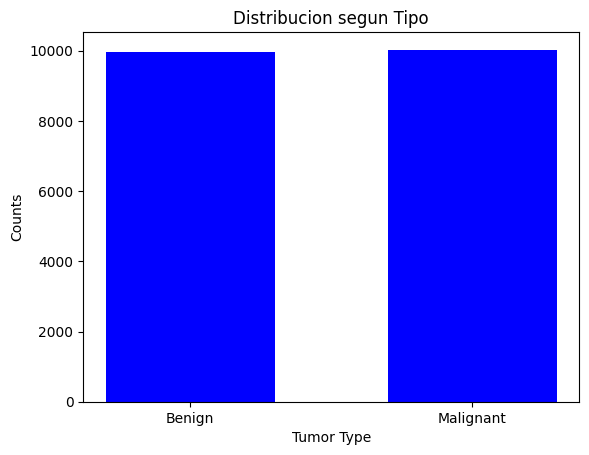

In [82]:
grafico_bar(df_type['Tumor_Type'], df_type['counts'], 'Distribucion segun Tipo', 'Tumor Type', 'Counts', 'blue')

Podemos observar que la distribucion de tipo esta casi a la par

In [83]:
#Por ubicacion
df_ubication = df[['Location']]
df_ubication.head()

,Location
0,Temporal
1,Parietal
2,Parietal
3,Temporal
4,Parietal


In [84]:
df_ubication = df_ubication.groupby('Location').size().reset_index(name='counts')
df_ubication.sort_values(by='counts', ascending=True)
df_ubication.head()

,Location,counts
0,Frontal,4925
1,Occipital,4967
2,Parietal,4990
3,Temporal,5118


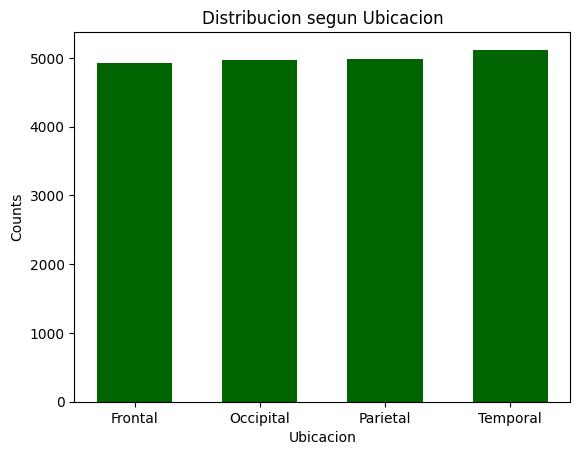

In [85]:
grafico_bar(df_ubication['Location'], df_ubication['counts'], 'Distribucion segun Ubicacion', 'Ubicacion', 'Counts', 'darkgreen')

La distribucion de tumores segun ubicacion tambien es equilibrada aunque la aparicion de estos en el lobulo temporal es mayor.

In [12]:
#Por Histologia 

df_histology = df[['Histology']]
df_histology.head()

,Histology
0,Astrocytoma
1,Glioblastoma
2,Meningioma
3,Medulloblastoma
4,Glioblastoma


In [13]:
df_histology = df_histology.groupby('Histology').size().sort_values(ascending=True).reset_index(name='counts')
df_histology.head()

,Histology,counts
0,Astrocytoma,4937
1,Medulloblastoma,4979
2,Meningioma,5016
3,Glioblastoma,5068


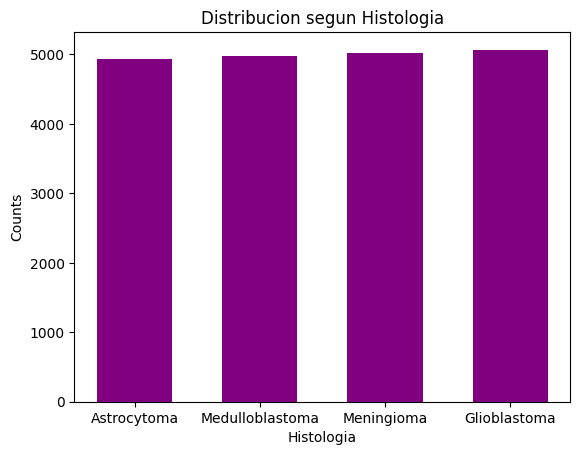

In [87]:
grafico_bar(df_histology['Histology'], df_histology['counts'], 'Distribucion segun Histologia', 'Histologia', 'Counts', 'purple')

Como observamos todos los datos estan organizados de forma equiparada por lo que saltaremos al siguiente analisis.

##### Distribucion de supervivencia

In [15]:
import seaborn as sns

In [16]:
#Haremos un histograma para ver la distribucion del survival rate
#Observeremos primero los valores unicos de la columna
df['Survival_Rate']

0        51.312579
1        46.373273
2        47.072221
3        51.853634
4        54.708987
           ...    
19995    58.229662
19996    77.706856
19997    89.543803
19998    83.306781
19999    47.433468
Name: Survival_Rate, Length: 20000, dtype: float64

Como vemos la informacion de la columna Survival Rate nos devuelve un numero float donde a mayor numero significa mayor esperanza de supervivencia

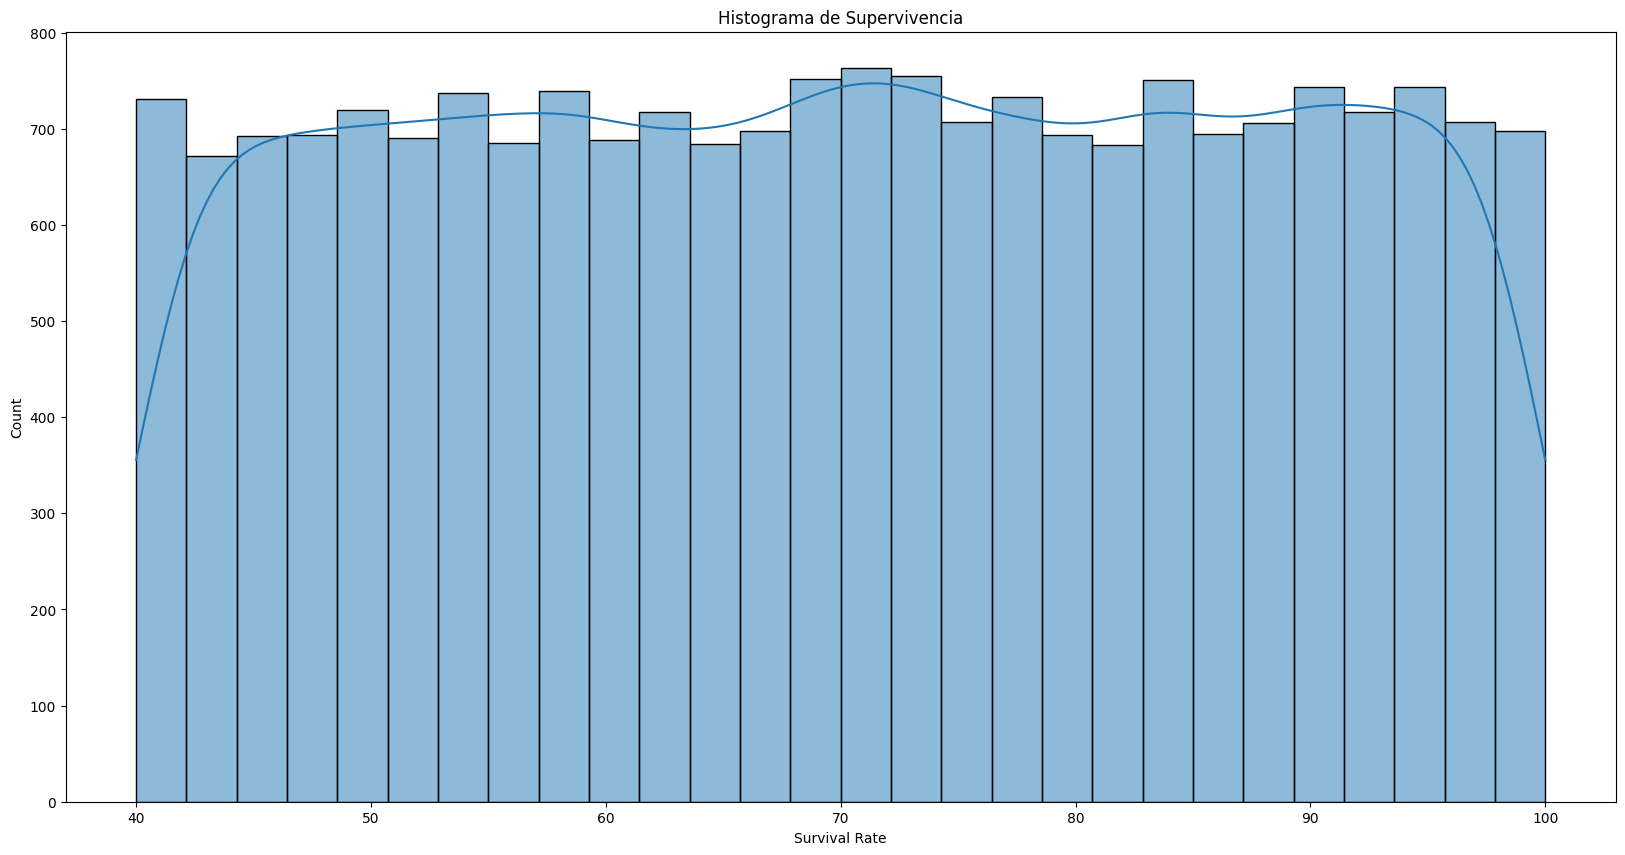

In [17]:
#Creamos el histograma
ax = sns.histplot(data=df, x='Survival_Rate', kde=True)#definir el histograma
ax.figure.set_size_inches(20, 10)#Tamano
ax.set_title('Histograma de Supervivencia')
ax.set_xlabel('Survival Rate');

El histograma muestra una distribucion plana, esto debido a la alta uniformidad de los datos, por lo que filtraremos segun tipo de tumor, estapa y tratamientos para observar si la distribucion cambia, posteriormente trataremos los datos con un metodo logaritmico para lograr una distribucion Simetrica.

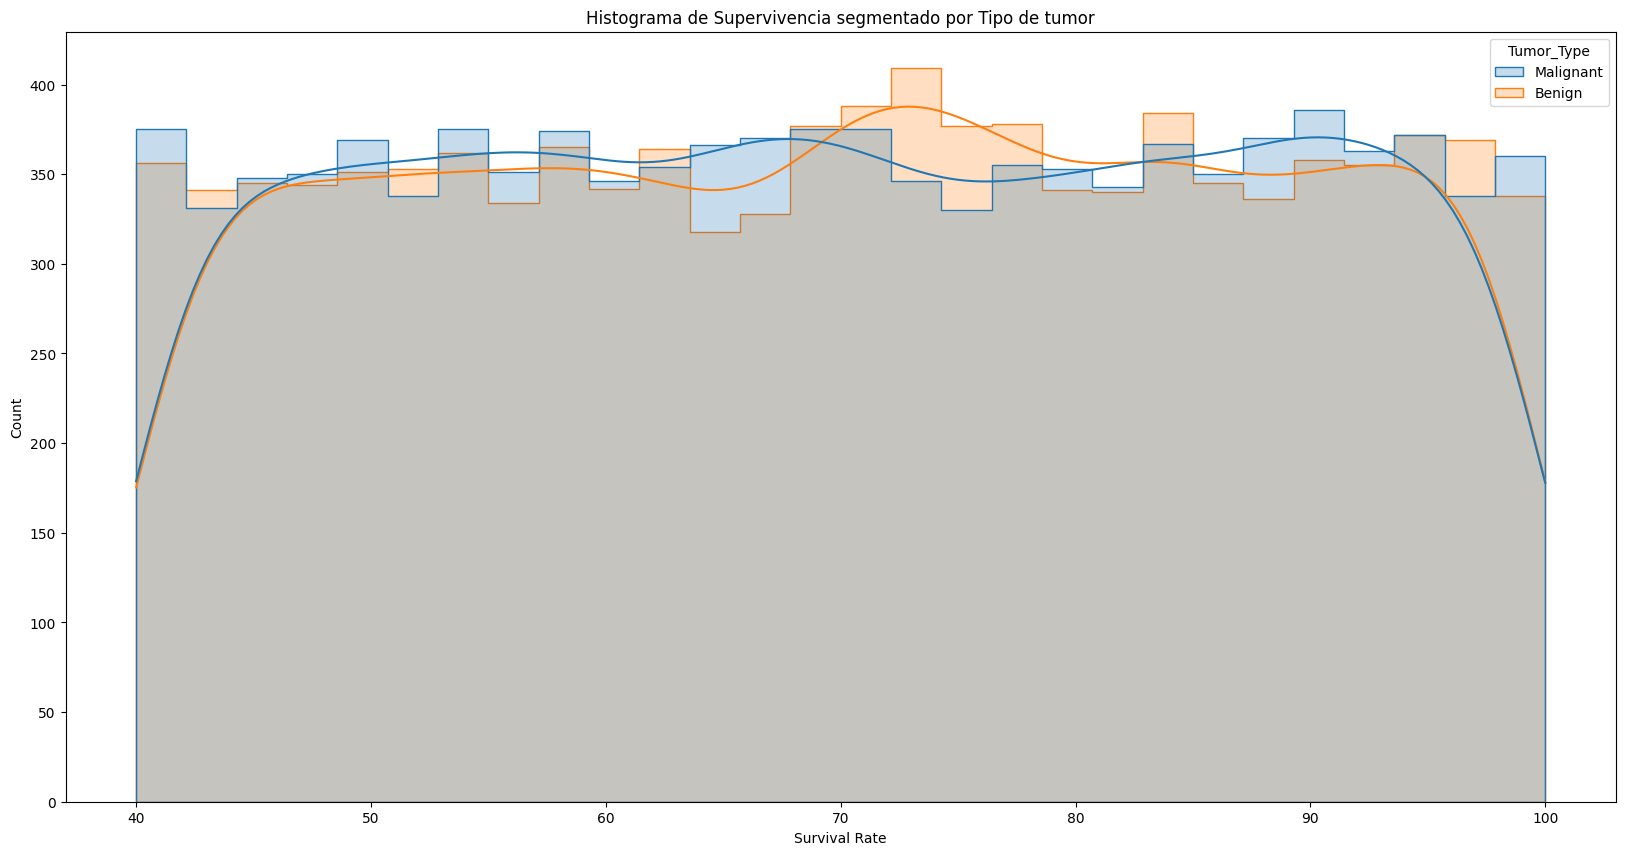

In [18]:
ax = sns.histplot(data=df, x='Survival_Rate', hue='Tumor_Type', element='step', kde=True)#definir el histograma
ax.figure.set_size_inches(20, 10)#Tamano
ax.set_title('Histograma de Supervivencia segmentado por Tipo de tumor')
ax.set_xlabel('Survival Rate');

In [89]:
def grafico_boxplot(data, x, y):
    sns.boxplot(data=data, x=x, y=y)
    plt.show()
    return

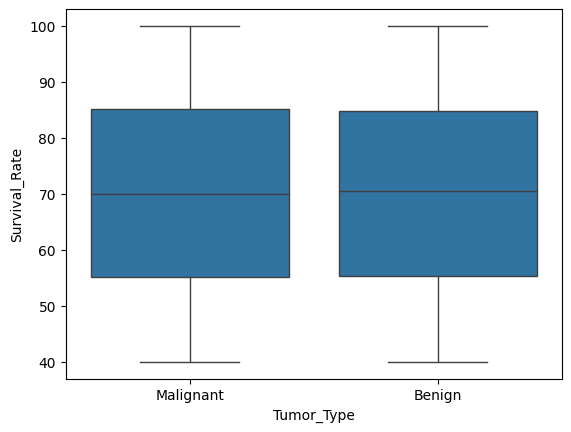

In [90]:
#La meseta no desaparecio, asi que haremos un boxplot para revisar los outliers
grafico_boxplot(df, 'Tumor_Type', 'Survival_Rate')

Los datos siguen teniendo una distribucion plana, lo que haremos sera seguir creando relaciones clave para luego crear el modelo

#### Analisis multivariable

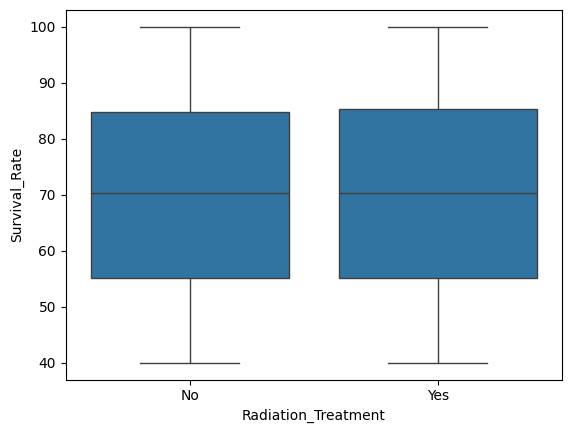

In [91]:
#Supervivencia vs Tratamientos
grafico_boxplot(data=df, x='Radiation_Treatment', y='Survival_Rate')

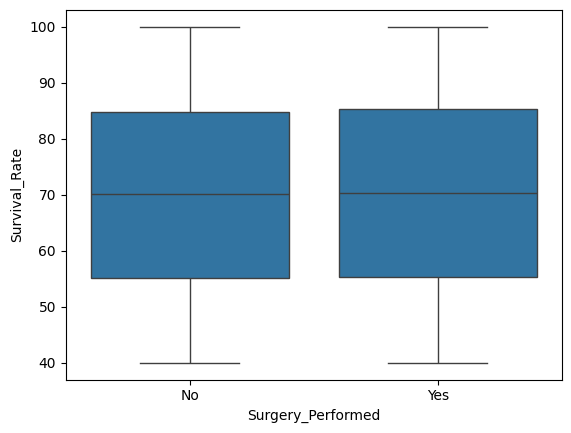

In [92]:
grafico_boxplot(data=df, x='Surgery_Performed', y='Survival_Rate')

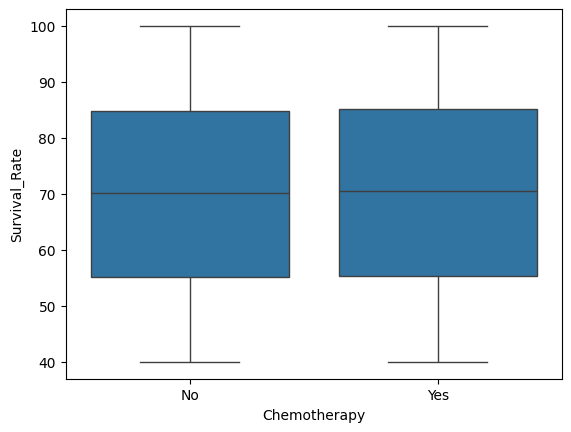

In [93]:
grafico_boxplot(data=df, x='Chemotherapy', y='Survival_Rate')

<Axes: xlabel='Age', ylabel='Survival_Rate'>

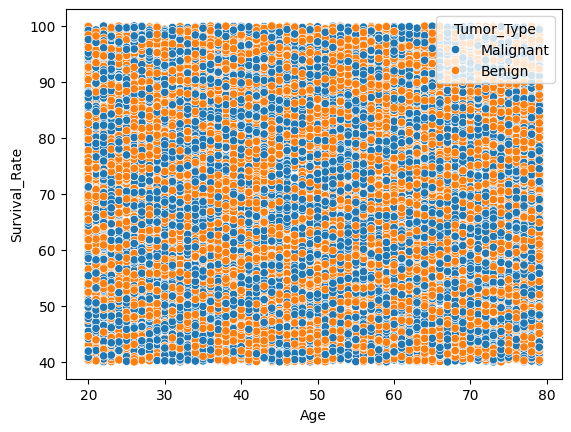

In [23]:
#Scatter PLot 
sns.scatterplot(data=df, x='Age', y='Survival_Rate', hue='Tumor_Type')

### Preprocesamiento del modelo

In [24]:
from sklearn.preprocessing import FunctionTransformer#Funcion para transformar datos por logaritmo
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression #Regresion lineal simple
from sklearn.model_selection import train_test_split #Dividir los datos para entrenar y testear
from sklearn.metrics import r2_score # Obtener el desempeño del modelo
import numpy as np

In [25]:
#Vamos a transformar las columnas de valores objeto a numeros con el metodo LabelEncoder 
df.sample()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
4381,4382,56,Male,Malignant,8.234169,Occipital,Meningioma,II,Seizures,Headache,Vision Issues,Yes,Yes,No,47.831496,1.22229,No,Positive,No


In [94]:
#Empezamos por el genero 
#Sabemos que solo hay dos generos Female y Male
le = LabelEncoder()
generos_codificados = le.fit_transform(df['Gender'])
generos_codificados

array([1, 1, 1, ..., 0, 1, 1])

In [95]:
pd.DataFrame({
        'Original' : df['Gender'],
        'Codificado' : generos_codificados
})

,Original,Codificado
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Female,0
...,...,...
19995,Male,1
19996,Female,0
19997,Female,0
19998,Male,1


In [97]:
for i in range (len(df.columns)):
    if df.dtypes[i] == 'object':
        le = LabelEncoder()
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

C:\Users\dell\AppData\Local\Temp\ipykernel_10424\3949139868.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.dtypes[i] == 'object':
C:\Users\dell\AppData\Local\Temp\ipykernel_10424\3949139868.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.dtypes[i] == 'object':
C:\Users\dell\AppData\Local\Temp\ipykernel_10424\3949139868.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.dtypes[i] == 'object':
C:\Users\dell

In [98]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,1,1,5.375612,3,0,2,3,2,2,0,0,0,51.312579,0.111876,0,1,1
1,2,26,1,0,4.847098,2,1,1,0,0,1,1,1,1,46.373273,2.165736,1,1,1
2,3,31,1,0,5.588391,2,3,0,3,0,2,0,0,0,47.072221,1.884228,0,0,0
3,4,29,1,1,1.436600,3,2,3,3,2,0,1,0,1,51.853634,1.283342,1,0,0
4,5,54,0,0,2.417506,2,1,0,0,0,2,0,0,1,54.708987,2.069477,0,1,1


In [99]:
df.drop(columns=['Follow_Up_Required'], inplace=True)
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result
0,1,73,1,1,5.375612,3,0,2,3,2,2,0,0,0,51.312579,0.111876,0,1
1,2,26,1,0,4.847098,2,1,1,0,0,1,1,1,1,46.373273,2.165736,1,1
2,3,31,1,0,5.588391,2,3,0,3,0,2,0,0,0,47.072221,1.884228,0,0
3,4,29,1,1,1.436600,3,2,3,3,2,0,1,0,1,51.853634,1.283342,1,0
4,5,54,0,0,2.417506,2,1,0,0,0,2,0,0,1,54.708987,2.069477,0,1


In [100]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                   int32
Tumor_Type               int32
Tumor_Size             float64
Location                 int32
Histology                int32
Stage                    int32
Symptom_1                int32
Symptom_2                int32
Symptom_3                int32
Radiation_Treatment      int32
Surgery_Performed        int32
Chemotherapy             int32
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History           int32
MRI_Result               int32
dtype: object

Ya tenemos el dataframe completamente en variables Numericas

In [34]:
transformer = FunctionTransformer(np.log1p, validate=True)#Transformar los datos por logaritmo
data_transformada = transformer.transform(df)#Aplicar la transformacion
#Esto nos devuelve un array de numpy

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [35]:
#Lo convertimos en dataframe
df_transformed = pd.DataFrame(data_transformada, columns=df.columns)
df_transformed.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result
0,0.693147,4.304065,0.693147,0.693147,1.852480,1.386294,0.000000,1.098612,1.386294,1.098612,1.098612,0.000000,0.000000,0.000000,3.957237,0.106048,0.000000,0.693147
1,1.098612,3.295837,0.693147,0.000000,1.765945,1.098612,0.693147,0.693147,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,3.858058,1.152385,0.693147,0.693147
2,1.386294,3.465736,0.693147,0.000000,1.885309,1.098612,1.386294,0.000000,1.386294,0.000000,1.098612,0.000000,0.000000,0.000000,3.872704,1.059257,0.000000,0.000000
3,1.609438,3.401197,0.693147,0.693147,0.890604,1.386294,1.098612,1.386294,1.386294,1.098612,0.000000,0.693147,0.000000,0.693147,3.967526,0.825640,0.693147,0.000000
4,1.791759,4.007333,0.000000,0.000000,1.228911,1.098612,0.693147,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.693147,4.020141,1.121507,0.000000,0.693147


<Axes: xlabel='Survival_Rate', ylabel='Count'>

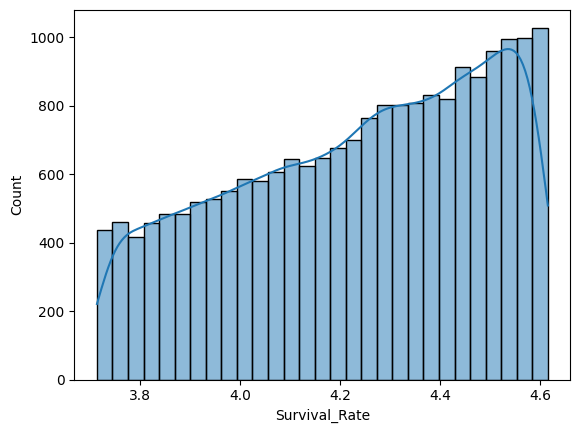

In [36]:
sns.histplot(data=df_transformed, x='Survival_Rate', kde=True)#Histograma de la primera columna

La distribucion se observa algo sesgada hacia la izquierda, lo que haremos sera entrenar dos modelos de regresion lineal, uno con la data original y otro con la data transformada para observar cual tiene mayor accuracy 

In [37]:
correlacion = df.corr()

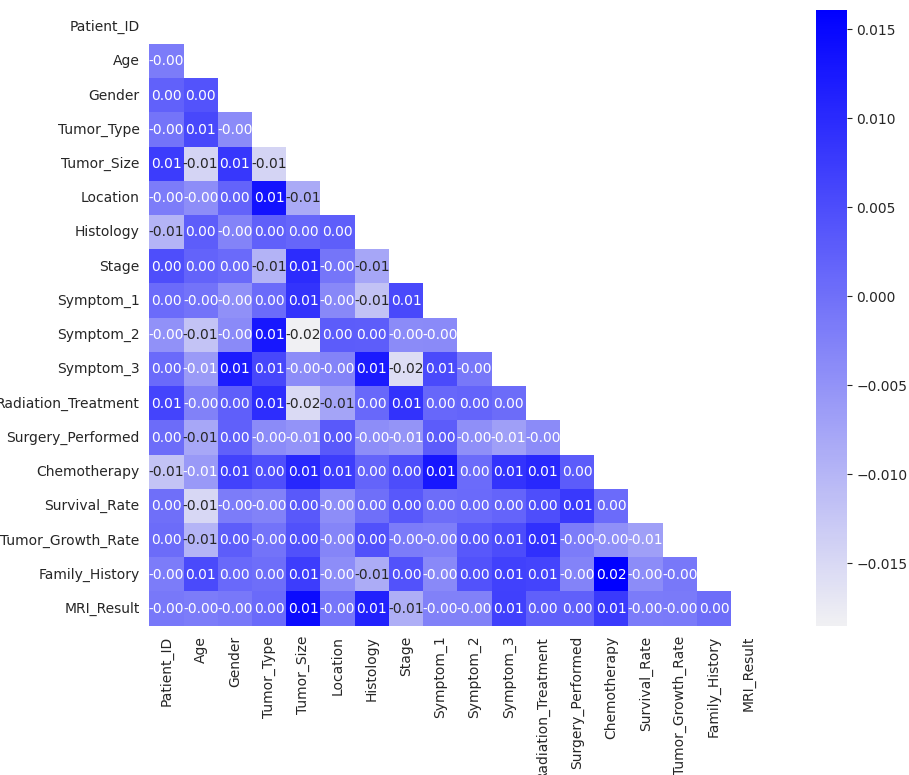

In [38]:
#Matriz de correlacion con datos originales 
cores = sns.color_palette('light:blue', as_cmap=True)
mask = np.zeros_like(correlacion)#Informacion
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

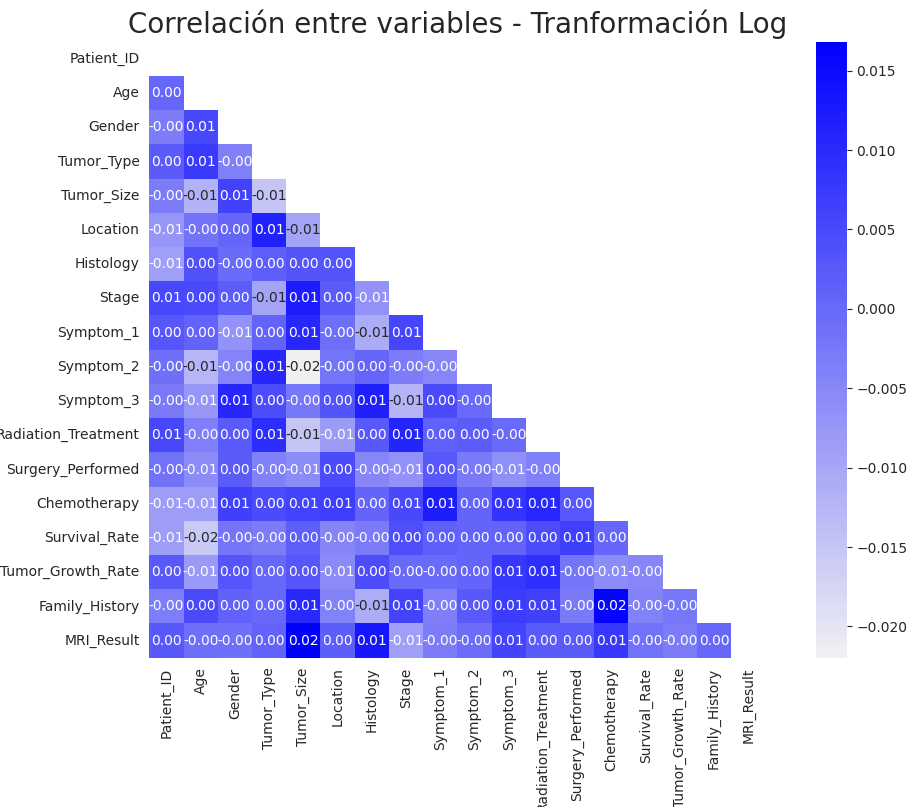

In [39]:
#Matriz de correlacion con datos transformados
corr_Transformado = df_transformed.corr()
mask = np.zeros_like(corr_Transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(corr_Transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

### 1- Primer Modelo con datos originales

##### Regresion

In [40]:
#Variables independientes 

x = df.drop(columns=['Survival_Rate'])#Variables independientes

#Variable dependiente
y = df['Survival_Rate']

Segmentacion de datos para entrenar 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #Segmentacion de los datos 

In [42]:
x_train.shape, x_test.shape #70% de los datos van a ser para entrenar y 30% para testear

((14000, 17), (6000, 17))

In [43]:
regresion = LinearRegression() #Modelo de regresion lineal

In [44]:
regresion.fit(x_train, y_train) #Entrenamiento del modelo

LinearRegression()

In [45]:
#Prueba 
y_pred = regresion.predict(x_test) #Prediccion

y_pred

array([70.28895054, 70.16353959, 70.51176194, ..., 69.4137126 ,
       70.64045691, 70.44795266])

In [46]:
r2_regresion = r2_score(y_test, y_pred)#Ponemos los verdaderos datos y los datos resultantes de la prediccion
r2_regresion #Metrica de desempeño

-0.000721857844294238

Con los datos originales el desempeño es horrible

### 2- Datos Transformados

In [47]:
x2 = df_transformed.drop(columns=['Survival_Rate'])#Variables independientes

y2 = df_transformed['Survival_Rate']#Variable dependiente 

In [48]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42) #Segmentacion de los datos 

In [49]:
regresion.fit(x2_train, y2_train) #Entrenamiento del modelo

LinearRegression()

In [50]:
#Prueba
prediccion2 = regresion.predict(x2_test)#Pasamos los datos restantes para testear

prediccion2 #Obtenemos el resultado de la prediccion

array([4.23045259, 4.2336446 , 4.24023241, ..., 4.22201833, 4.23772001,
       4.23820008])

In [51]:
r2_regresion2 = r2_score(y2_test, prediccion2)#Ponemos los verdaderos datos y los datos resultantes de la prediccion
r2_regresion2 #Metrica de desempeño

-0.0002999934428866702

In [114]:
names = []
names.append("LinearRegression")

In [120]:
r2scores = []
r2scores.append(r2_regresion2)


### 3- Random forest 

Probaremos el metodo de random forest y lo optimizaremos con Random Search validation


In [52]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold #Validacion cruzada

In [53]:
rf = RandomForestRegressor(
    n_estimators=50,#Numero de arboles
    max_depth=5#Numero de ramas
)

In [54]:
#Entrenamiento
rf.fit(x2_test, y2_test)

RandomForestRegressor(max_depth=5, n_estimators=50)

In [55]:
prediccion_rf = rf.predict(x2_test)#Prediccion

prediccion_rf

array([4.24359169, 4.22183429, 4.2431912 , ..., 4.2255969 , 4.23133591,
       4.23565232])

In [122]:
names.append("RandomForestRegressor")


In [124]:
r2scores.append(r2_score(y2_test, prediccion_rf))
r2_score(y2_test, prediccion_rf)#Metrica de desempeño

0.04059796772599289

Obtuvimos un mejor desempe;o que con los modelos anteriores, ahora lo optimizaremos

In [57]:
cv = KFold(n_splits=7, shuffle=True) #n_splits = numero de particiones de los subconjuntos

In [65]:
param_random_rf = {
    'n_estimators': [150, 250],#numero de arboles
    'max_depth': [20, 30, 45],#profundidad del arbol
    'min_samples_leaf': [3],#minimo de hojas o resultados finales
    'min_samples_split': [6, 8, 10],#minimo de divisiones
}

In [66]:
#Ahora entrenamos el modelo con los parametros para ver cual es el bosque optimo 
randomcv_rf = RandomizedSearchCV(
    rf,#Modelo a mejorar 
    param_random_rf,#Parametros
    n_iter=10, #Numero de iteraciones
    cv=cv, 
    scoring='r2',
    n_jobs=1, #Numero de trabajos en simultaneo para evaluar
)

In [67]:
randomcv_rf.fit(x2_train, y2_train)#Entrenamiento

RandomizedSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=True),
                   estimator=RandomForestRegressor(max_depth=5,
                                                   n_estimators=50),
                   n_jobs=1,
                   param_distributions={'max_depth': [20, 30, 45],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [6, 8, 10],
                                        'n_estimators': [150, 250]},
                   scoring='r2')

In [68]:
pd.DataFrame(randomcv_rf.cv_results_) #obtener resultados

randomcv_rf.best_params_ #Obtener parametros mas eficientes

{'n_estimators': 150,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 20}

In [69]:
rf_optimizado = RandomForestRegressor(
    n_estimators=150,
    min_samples_split=8,
    min_samples_leaf=3,
    max_depth=20
)

In [70]:
#Entrenar el modelo optimizado

rf_optimizado.fit(x2_train, y2_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=150)

In [71]:
prediccion_rf_optimizado = rf_optimizado.predict(x2_test)#Prediccion

prediccion_rf_optimizado

array([4.23310418, 4.260581  , 4.19578222, ..., 4.16272548, 4.29295261,
       4.23934449])

In [126]:
names.append("RandomForestRegressorOptimizado")

In [127]:
r2scores.append(r2_score(y2_test, prediccion_rf_optimizado))
r2_score(y2_test, prediccion_rf_optimizado)#Metrica de desempeño

-0.012823323557672017

Si bien optimizamos el modelo, el error cuadrado medio con mejor puntaje fue el de el primer Random Forest Regressor, a continuacion mostraremos las puntuaciones de todos los modelos

### Conclusion

In [132]:
for name, r2score in zip(names, r2scores):
    print(f'{name} - R2 Score: {r2score}\n')

LinearRegression - R2 Score: -0.0002999934428866702

RandomForestRegressor - R2 Score: 0.04059796772599289

RandomForestRegressorOptimizado - R2 Score: -0.012823323557672017

